In [13]:
import glob
import imageio
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.segmentation import find_boundaries

from deepcell.applications import Mesmer
from deepcell.utils.plot_utils import create_rgb_image

In [2]:
mesmer_app = Mesmer()

2022-10-27 20:16:14.524540: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 20:16:15.146999: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10415 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:06:00.0, compute capability: 6.1


In [18]:
df_fov = pd.read_csv('../data/tissue_data/villus_gene_identities.csv')
df_fov.head()

,x,y,z,fov_id,predicted_name,predicted_id,probability,distance
0,1894,1672,0,201,Thy1,60,0.874600,NaN
1,1848,1704,0,201,Cnr1,32,0.994194,NaN
2,982,1791,0,201,Neat1,49,1.000000,NaN
3,1919,1586,0,201,Etv1,33,0.999963,NaN
4,1881,1685,0,201,Cnr1,32,0.999999,NaN


In [20]:
df_ada = df_fov.loc[df_fov.predicted_name == 'Ada']  # Enterocyte (top villus)
df_slc51a = df_fov.loc[df_fov.predicted_name == 'Slc51a']  # Enterocyte (whole villus)
df_slc5a1 = df_fov.loc[df_fov.predicted_name == 'Slc5a1']  # Enterocyte (whole villus)
df_nlrp6 = df_fov.loc[df_fov.predicted_name == 'Nlrp6']  # Enterocyte (bottom villus)
df_klk1 = df_fov.loc[df_fov.predicted_name == 'Klk1']  # Goblet
df_krt7 = df_fov.loc[df_fov.predicted_name == 'Krt7']  # Goblet
df_c1qb = df_fov.loc[df_fov.predicted_name == 'C1qb']  # Macrophage
df_ighd = df_fov.loc[df_fov.predicted_name == 'Ighd']  # B (follicular)
df_mzb1 = df_fov.loc[df_fov.predicted_name == 'Mzb1']  # B (plasma)
df_cd79a = df_fov.loc[df_fov.predicted_name == 'Cd79a']  # B
df_cd79b = df_fov.loc[df_fov.predicted_name == 'Cd79b']  # B
df_cd4 = df_fov.loc[df_fov.predicted_name == 'Cd4']  # T (CD4+)
df_trpm5 = df_fov.loc[df_fov.predicted_name == 'Trpm5']  # Tuft
df_avil = df_fov.loc[df_fov.predicted_name == 'Avil']  # Tuft
df_mptx2 = df_fov.loc[df_fov.predicted_name == 'Mptx2']  # Paneth
df_nes = df_fov.loc[df_fov.predicted_name == 'Nes']  # Endothelial
df_adgrf5 = df_fov.loc[df_fov.predicted_name == 'Adgrf5']  # Endothelial
df_scarb1 = df_fov.loc[df_fov.predicted_name == 'Scarb1']  # Endothelial
df_mki67 = df_fov.loc[df_fov.predicted_name == 'Mki67']  # Stem + TA
df_sox4 = df_fov.loc[df_fov.predicted_name == 'Sox4']  # Stem + TA

In [33]:
segmentation_im = imageio.volread('../data/tissue_data/villus_segmentation.tiff')
pred = mesmer_app.predict(segmentation_im, image_mpp=0.11)
cell_bounds = find_boundaries(pred[0,...,0])
np.shape(pred)

/usr/local/lib/python3.8/dist-packages/deepcell_toolbox/deep_watershed.py:179: FutureWarning: `selem` is a deprecated argument name for `h_maxima`. It will be removed in version 1.0. Please use `footprint` instead.
  markers = h_maxima(image=maxima,


(1, 2048, 2048, 1)

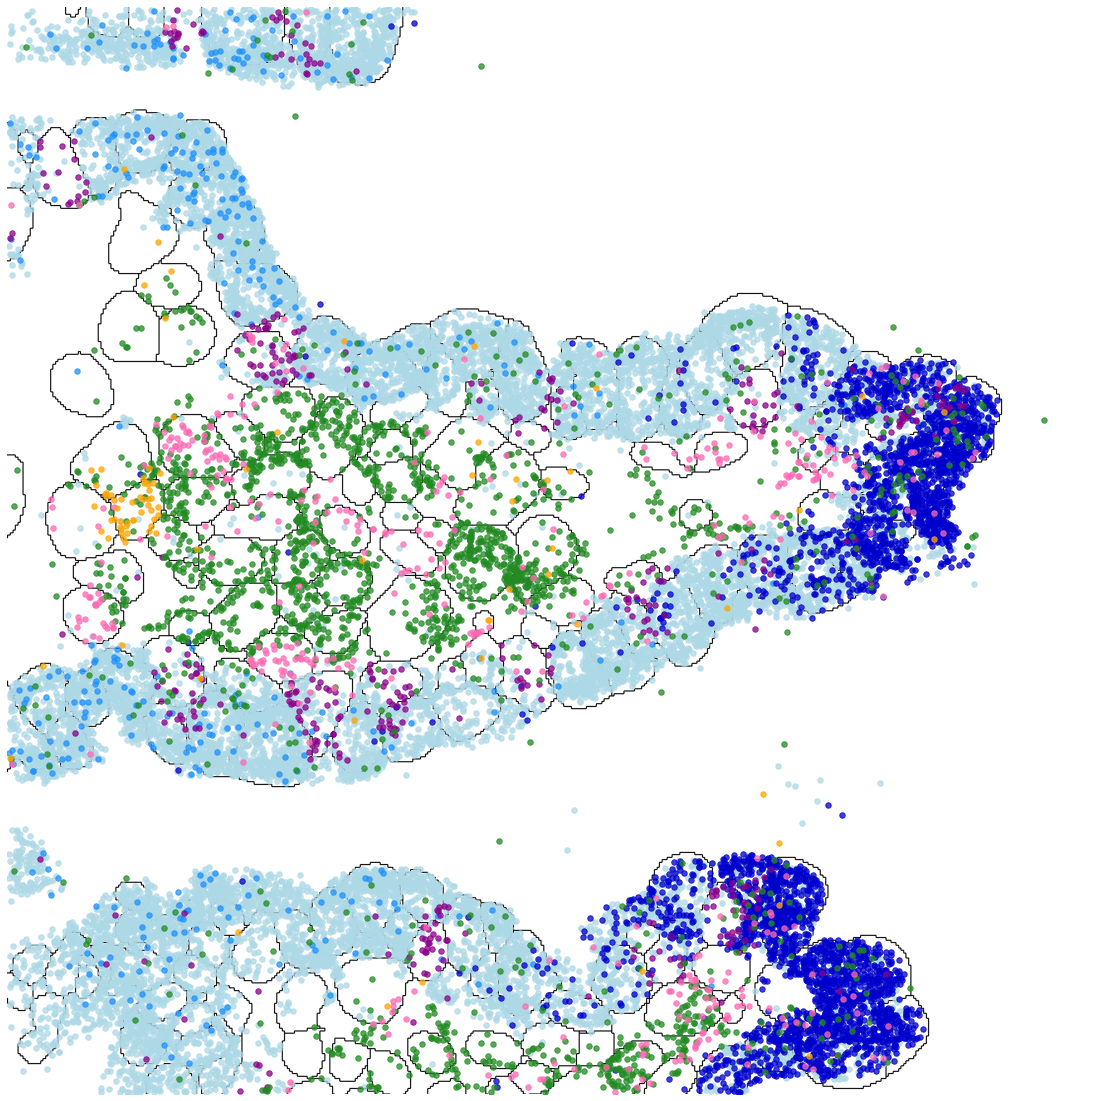

In [22]:
s=30
a=0.75

plt.figure(figsize=(20,20))


plt.scatter(df_slc51a.y, df_slc51a.x, color='lightblue', alpha=a, s=s, label='Enterocyte')
plt.scatter(df_slc5a1.y, df_slc5a1.x, color='lightblue', alpha=a, s=s, label='Enterocyte')
plt.scatter(df_nlrp6.y, df_nlrp6.x, color='dodgerblue', alpha=a, s=s, label='Enterocyte (Bottom)')
plt.scatter(df_ada.y, df_ada.x, color='mediumblue', alpha=a, s=s, label='Enterocyte (Top)')

plt.scatter(df_klk1.y, df_klk1.x, color='darkmagenta', alpha=a, s=s, label='Goblet')
plt.scatter(df_krt7.y, df_krt7.x, color='darkmagenta', alpha=a, s=s) # Goblet cells

plt.scatter(df_c1qb.y, df_c1qb.x, color='forestgreen', alpha=a, s=s, label='Macrophage')
plt.scatter(df_ighd.y, df_ighd.x, color='forestgreen', alpha=a, s=s, label='B cell')
plt.scatter(df_mzb1.y, df_mzb1.x, color='forestgreen', alpha=a, s=s)  # B cells
plt.scatter(df_cd79a.y, df_cd79a.x, color='forestgreen', alpha=a, s=s)  # B cells
plt.scatter(df_cd79b.y, df_cd79b.x, color='forestgreen', alpha=a, s=s)  # B cells
plt.scatter(df_cd4.y, df_cd4.x, color='forestgreen', alpha=a, s=s, label='T cell')

plt.scatter(df_nes.y, df_nes.x, color='hotpink', alpha=a, s=s, label='Endothelial')
plt.scatter(df_adgrf5.y, df_adgrf5.x, color='hotpink', alpha=a, s=s)  # Endothelial
plt.scatter(df_scarb1.y, df_scarb1.x, color='hotpink', alpha=a, s=s)  # Endothelial

plt.scatter(df_mki67.y, df_mki67.x, color='orange', alpha=a, s=s)  # Stem+TA
plt.imshow(cell_bounds[40:-40, 40:-40]*-1, cmap='gray')

plt.xticks([])
plt.yticks([])

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 88499/88499 [00:07<00:00, 11467.56it/s]


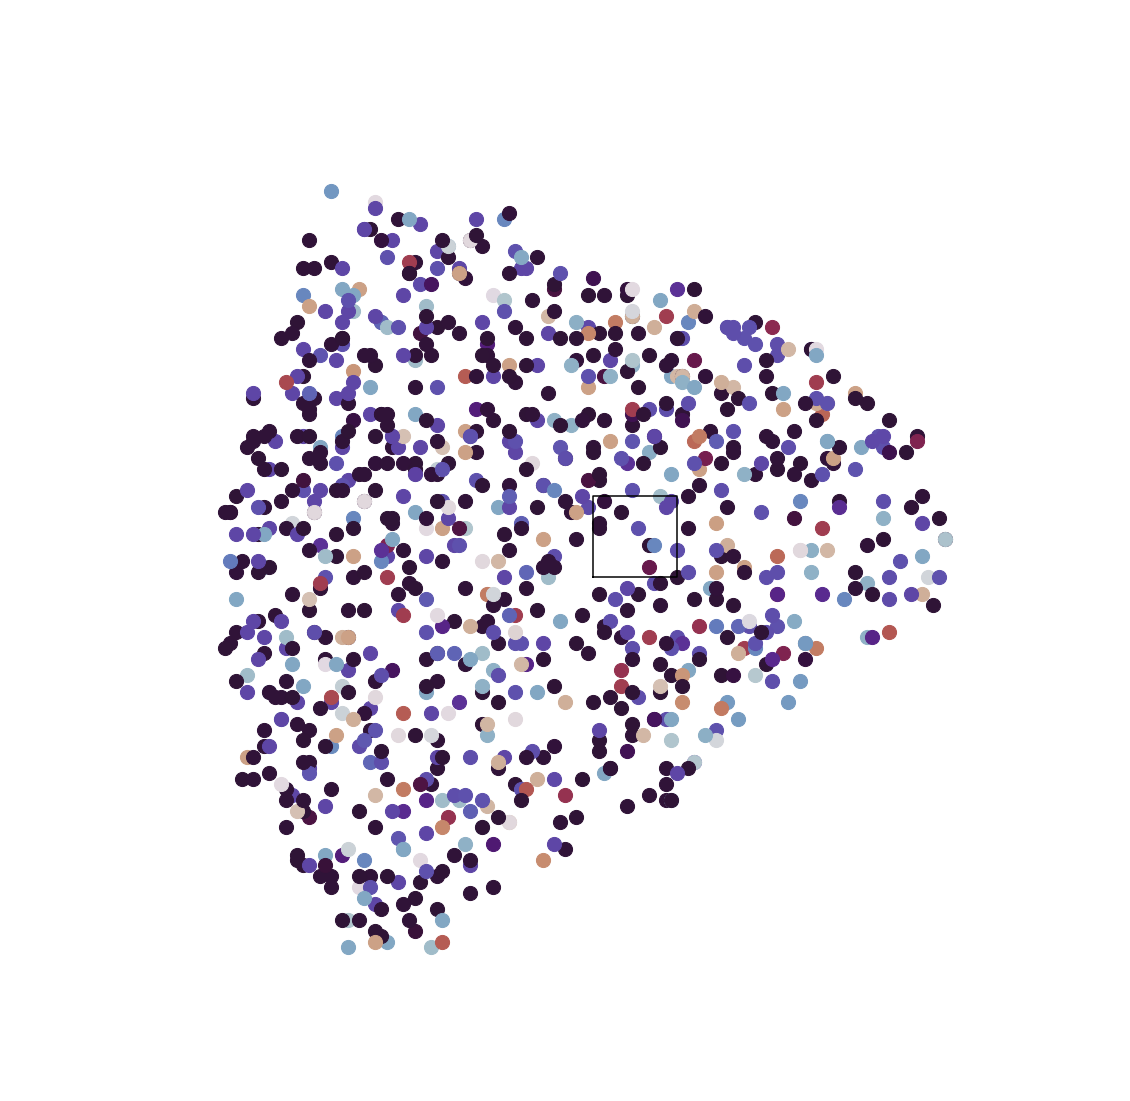

In [31]:
cmap = matplotlib.cm.get_cmap('twilight_shifted')
cmap_list = [cmap(item/266) for item in df_fov.predicted_id]
plt.figure(figsize=(20,20))

for i in tqdm(range(len(df_fov))):
    if pred[0, int(df_fov.x.iloc[i]), int(df_fov.y.iloc[i]), 0] == 23:
        plt.scatter(df_fov.x.iloc[i], df_fov.y.iloc[i],
                    color=cmap_list[i], alpha=1, s=200)

box_xmin = 655
box_xmax = 670
box_ymin = 875
box_ymax = 890

plt.plot([box_xmin, box_xmax, box_xmax, box_xmin, box_xmin], [box_ymin, box_ymin, box_ymax, box_ymax, box_ymin], 'k')

plt.xticks([])
plt.yticks([])

plt.xlim([550,750])
plt.ylim([780,980])

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [24]:
df_crop_ent = df_fov[df_fov.x > box_xmin]
df_crop_ent = df_crop_ent[df_crop_ent.x < box_xmax]
df_crop_ent = df_crop_ent[df_crop_ent.y > box_ymin]
df_crop_ent = df_crop_ent[df_crop_ent.y < box_ymax]
df_crop_ent

,x,y,z,fov_id,predicted_name,predicted_id,probability,distance
6580,665,877,0,226,Glp2r,238,0.825990,NaN
16359,656,884,2,226,Slc51a,1,0.999991,NaN
22817,660,887,2,226,background,266,0.970158,NaN
30204,663,884,3,226,Slc5a1,50,0.999573,NaN
41384,668,888,4,226,Apob,45,0.999999,NaN
52081,669,889,5,226,Apob,45,0.999976,NaN
56091,657,889,5,226,Cps1,4,0.751887,NaN
57813,656,885,5,226,Slc51a,1,0.999996,NaN
64607,665,881,6,226,background,266,0.878815,NaN
70114,666,881,7,226,Ifnar1,75,1.000000,NaN


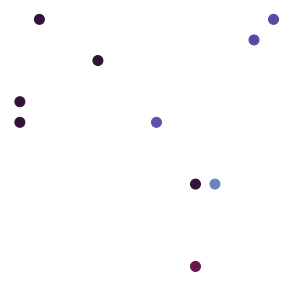

In [30]:
cmap_list = [cmap(item/266) for item in df_crop_ent.predicted_id]

plt.figure(figsize=(5,5))
plt.scatter(df_crop_ent.x, df_crop_ent.y, c=cmap_list, s=100)
plt.xticks([])
plt.yticks([])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()
# plt.savefig('/data/users/emily/SeqFISH/figures/20220816-enterocyte_crop.pdf')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 88499/88499 [00:06<00:00, 13707.15it/s]


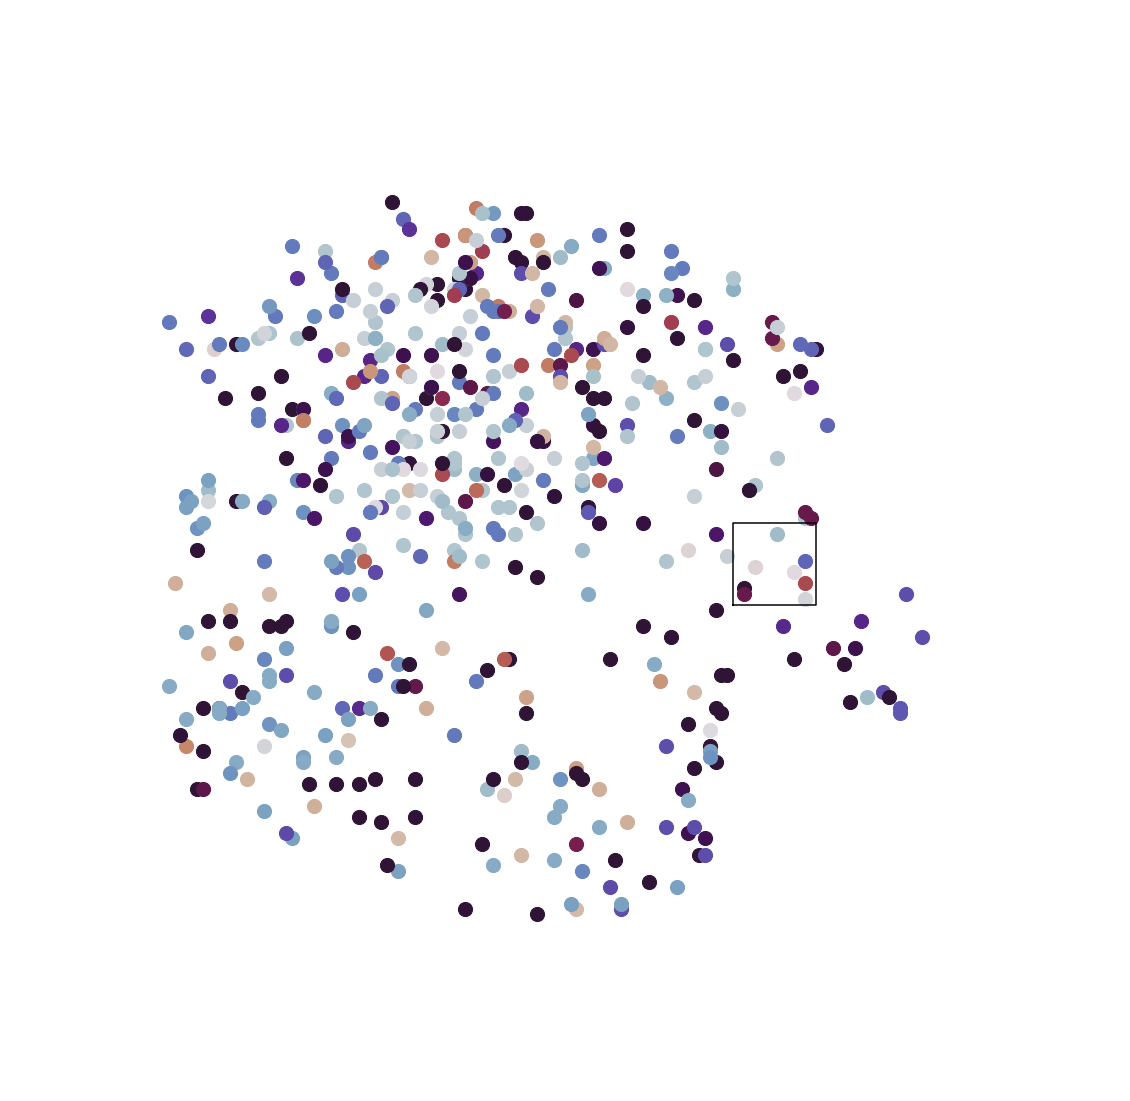

In [26]:
cmap = matplotlib.cm.get_cmap('twilight_shifted')
cmap_list = [cmap(item/266) for item in df_fov.predicted_id]
plt.figure(figsize=(20,20))

for i in tqdm(range(len(df_fov))):
    if pred[0, int(df_fov.x.iloc[i]), int(df_fov.y.iloc[i]), 0] == 81:
        plt.scatter(df_fov.x.iloc[i], df_fov.y.iloc[i],
                    color=cmap_list[i], alpha=1, s=200)

box_xmin = 1080
box_xmax = 1095
box_ymin = 890
box_ymax = 905

plt.plot([box_xmin, box_xmax, box_xmax, box_xmin, box_xmin], [box_ymin, box_ymin, box_ymax, box_ymax, box_ymin], 'k')
        
plt.xticks([])
plt.yticks([])

plt.xlim([950,1150])  # 200x200
plt.ylim([800,1000])

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()
# plt.savefig('/data/users/emily/SeqFISH/figures/20220816-immune_cell_all_genes.pdf')

In [27]:
df_crop_b = df_fov[df_fov.x > box_xmin]
df_crop_b = df_crop_b[df_crop_b.x < box_xmax]
df_crop_b = df_crop_b[df_crop_b.y > box_ymin]
df_crop_b = df_crop_b[df_crop_b.y < box_ymax]
df_crop_b

,x,y,z,fov_id,predicted_name,predicted_id,probability,distance
61774,1082,893,6,226,background,266,0.999791,NaN
62411,1093,898,6,226,Vim,58,0.999960,NaN
66117,1088,903,6,226,H2-Eb1,104,0.587676,NaN
67313,1093,894,6,226,Htr6,206,0.987631,NaN
69859,1084,897,7,226,Gpr55,142,0.663502,NaN
70608,1093,891,7,226,Tnfrsf21,122,1.000000,NaN
83571,1082,892,8,226,Glp2r,238,1.000000,NaN
84026,1091,896,8,226,Lpar1,135,1.000000,NaN


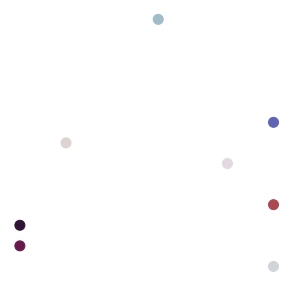

In [29]:
cmap_list = [cmap(item/266) for item in df_crop_b.predicted_id]

plt.figure(figsize=(5,5))
plt.scatter(df_crop_b.x, df_crop_b.y, c=cmap_list, s=100)
plt.xticks([])
plt.yticks([])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()